# Muliclass classifier on IRIS dataset

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import roc_curve, auc, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import label_binarize

In [64]:
# Load the Iris dataset
iris = load_iris()
X = iris.data  # Features
y = iris.target  # Labels

In [65]:
# One-hot encode the labels: use (1,0,0), (0,1,0), (0,0,1)
y = to_categorical(y)

In [66]:
# Split data into training (60%), test (20%), and validation (20%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

In [67]:
# Check the shapes of the datasets
print(f"Training set shape: X_train={X_train.shape}, y_train={y_train.shape}")
print(f"Validation set shape: X_val={X_val.shape}, y_val={y_val.shape}")
print(f"Test set shape: X_test={X_test.shape}, y_test={y_test.shape}")

Training set shape: X_train=(90, 4), y_train=(90, 3)
Validation set shape: X_val=(30, 4), y_val=(30, 3)
Test set shape: X_test=(30, 4), y_test=(30, 3)


In [68]:
#remove not needed datasets to reduce memory consumption
del X_temp, y_temp, X, y

In [69]:
# Define the neural network model
model = Sequential()

In [70]:
# Add layers
model.add(Input(shape=(X_train.shape[1],)))
model.add(Dense(16, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(16, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(y_train.shape[1], activation='softmax'))  # Output layer

/Users/maurizio/Library/Python/3.12/lib/python/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [71]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [72]:
# Train the model
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, batch_size=32)

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.6380 - loss: 0.9852 - val_accuracy: 0.6667 - val_loss: 0.9467
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6927 - loss: 0.9495 - val_accuracy: 0.6667 - val_loss: 0.9196
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6380 - loss: 0.9275 - val_accuracy: 0.6667 - val_loss: 0.8966
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6771 - loss: 0.8958 - val_accuracy: 0.6667 - val_loss: 0.8751
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6380 - loss: 0.8858 - val_accuracy: 0.6667 - val_loss: 0.8554
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6810 - loss: 0.8462 - val_accuracy: 0.6667 - val_loss: 0.8360
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6615 - loss: 0.8388 - val_accuracy: 0.6667 - val_loss: 0.8166
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6185 - loss: 0.8374 - val_accuracy: 0.6667 - val_loss: 0.7978

In [73]:
# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 1.0000 - loss: 0.0851
Test Loss: 0.0851
Test Accuracy: 1.0000


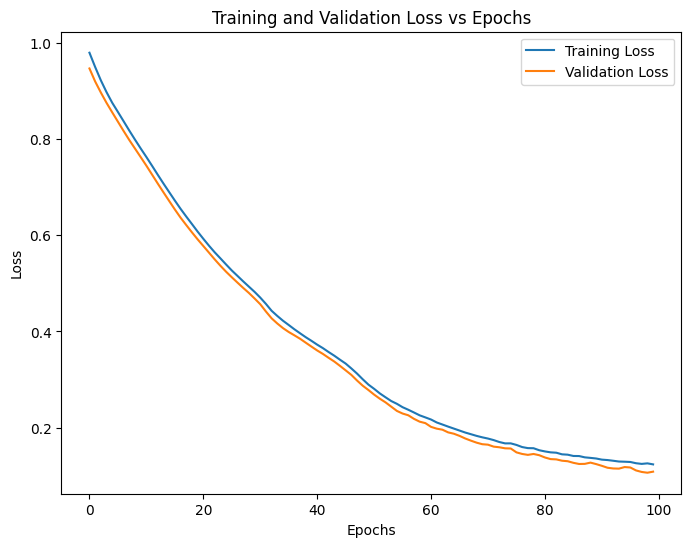

In [74]:
# Plot training & validation loss vs epochs
plt.figure(figsize=(8,6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [75]:
# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 1.0000 - loss: 0.0851
Test Loss: 0.0851
Test Accuracy: 1.0000


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


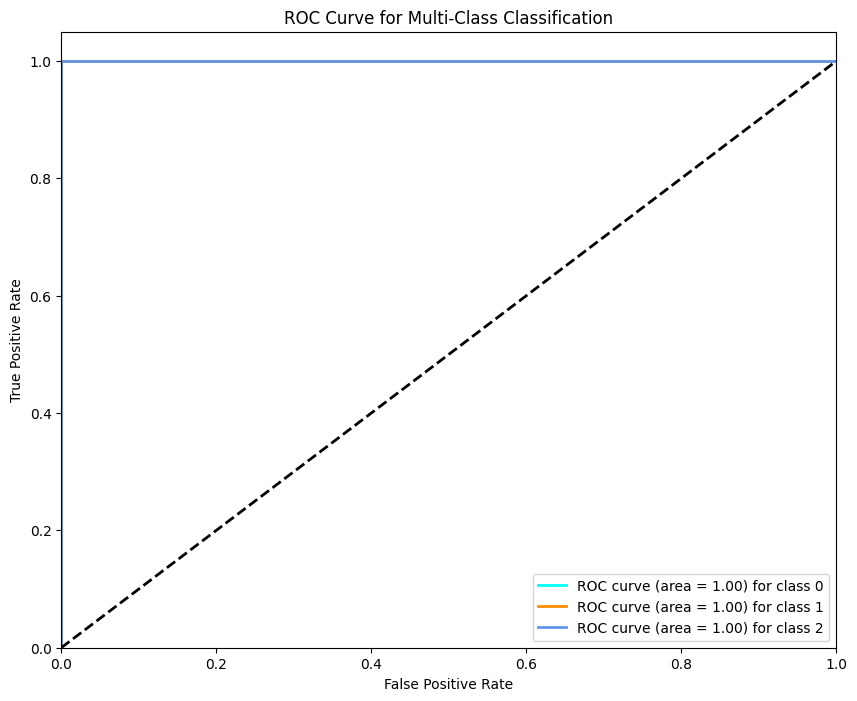

In [76]:
# ROC curve for the test dataset (One-vs-Rest)
n_classes = y_test.shape[1]

# Predict probabilities on the test set
y_score = model.predict(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
plt.figure(figsize=(10, 8))
colors = ['aqua', 'darkorange', 'cornflowerblue']

for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'ROC curve (area = {roc_auc[i]:.2f}) for class {i}')

plt.plot([0, 1], [0, 1], 'k--', lw=2)  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Multi-Class Classification')
plt.legend(loc="lower right")
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


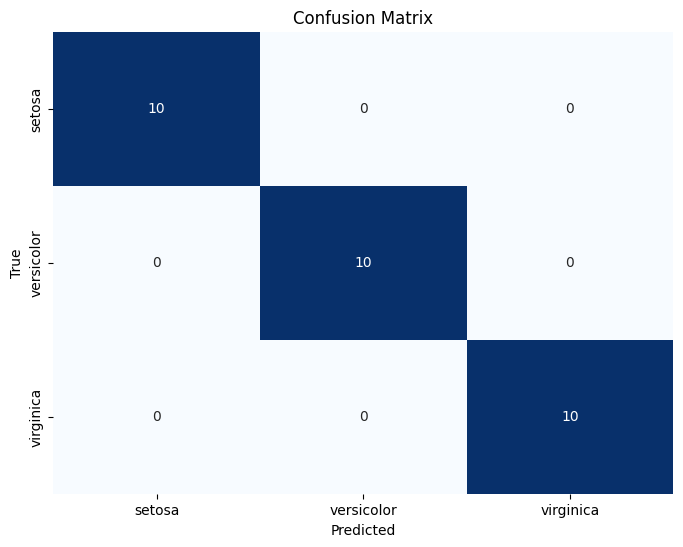

In [77]:
# Confusion matrix for the test dataset
y_pred = np.argmax(model.predict(X_test), axis=1)  # Convert probabilities to class labels
y_true = np.argmax(y_test, axis=1)

cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=iris.target_names,
            yticklabels=iris.target_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Binary classifier on TITANIC dataset

In [109]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [110]:
# Load Titanic dataset from Kaggle or local file (if downloaded)
# URL: 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'
url = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'
titanic_data = pd.read_csv(url)

In [111]:
# Display the first few rows of the dataset
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [112]:
# some standard processing 
# Fill missing values in 'Age' with the median age
titanic_data['Age'].fillna(titanic_data['Age'].median(), inplace=True)

# Fill missing values in 'Embarked' with the mode (most frequent value)
titanic_data['Embarked'].fillna(titanic_data['Embarked'].mode()[0], inplace=True)

# Drop rows where 'Fare' is missing (if any)
titanic_data.dropna(subset=['Fare'], inplace=True)

# Drop unnecessary columns (PassengerId, Name, Ticket, Cabin)
titanic_data.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'], inplace=True)

# Convert categorical features 'Sex' and 'Embarked' to numeric using LabelEncoder
label_encoder = LabelEncoder()
titanic_data['Sex'] = label_encoder.fit_transform(titanic_data['Sex'])
titanic_data['Embarked'] = label_encoder.fit_transform(titanic_data['Embarked'])


/var/folders/vr/sxc1jhmd7b32kypjhkt0yqch0000gn/T/ipykernel_32225/183014243.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_data['Age'].fillna(titanic_data['Age'].median(), inplace=True)
/var/folders/vr/sxc1jhmd7b32kypjhkt0yqch0000gn/T/ipykernel_32225/183014243.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are

In [113]:
# Define features (X) and target (y)
X = titanic_data.drop(columns=['Survived'])
y = titanic_data['Survived']

In [114]:
# Normalize the features using StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [115]:
# Split the dataset into training (60%), test (20%), and validation (20%) sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

In [116]:
#remove not needed datasets to reduce memory consumption
del X_temp, y_temp, X, y

In [117]:
# Check the shapes of the datasets
print(f"Training set shape: X_train={X_train.shape}, y_train={y_train.shape}")
print(f"Validation set shape: X_val={X_val.shape}, y_val={y_val.shape}")
print(f"Test set shape: X_test={X_test.shape}, y_test={y_test.shape}")

Training set shape: X_train=(534, 7), y_train=(534,)
Validation set shape: X_val=(178, 7), y_val=(178,)
Test set shape: X_test=(179, 7), y_test=(179,)


In [138]:
# Define the neural network model
model = Sequential()

In [139]:
# Add layers
model.add(Input(shape=(X_train.shape[1],)))
model.add(Dense(8, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(4, activation='relu'))
model.add(Dense(2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # Output layer for binary classification

/Users/maurizio/Library/Python/3.12/lib/python/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [140]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [141]:
# Train the model
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, batch_size=32)

Epoch 1/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6250 - loss: 0.7659 - val_accuracy: 0.6180 - val_loss: 0.7384
Epoch 2/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 726us/step - accuracy: 0.5765 - loss: 0.7376 - val_accuracy: 0.6180 - val_loss: 0.7179
Epoch 3/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 800us/step - accuracy: 0.5984 - loss: 0.7227 - val_accuracy: 0.6180 - val_loss: 0.7011
Epoch 4/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 747us/step - accuracy: 0.6059 - loss: 0.7003 - val_accuracy: 0.6180 - val_loss: 0.6888
Epoch 5/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 821us/step - accuracy: 0.5808 - loss: 0.6907 - val_accuracy: 0.6180 - val_loss: 0.6810
Epoch 6/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 735us/step - accuracy: 0.6337 - loss: 0.6818 - val_accuracy: 0.6180 - val_loss: 0.6750
Epoch 7/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 738us/step - accuracy: 0.6007 - loss: 0.6780 - val_accuracy: 0.6180 - val_loss: 0.6700
Epoch 8/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 679us/step - accuracy: 0.6433 - loss: 0.6665 - val_accura

In [142]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 354us/step - accuracy: 0.7808 - loss: 0.5298
Test Loss: 0.5366
Test Accuracy: 0.7709


In [143]:
# Plot training & validation accuracy and loss
import matplotlib.pyplot as plt

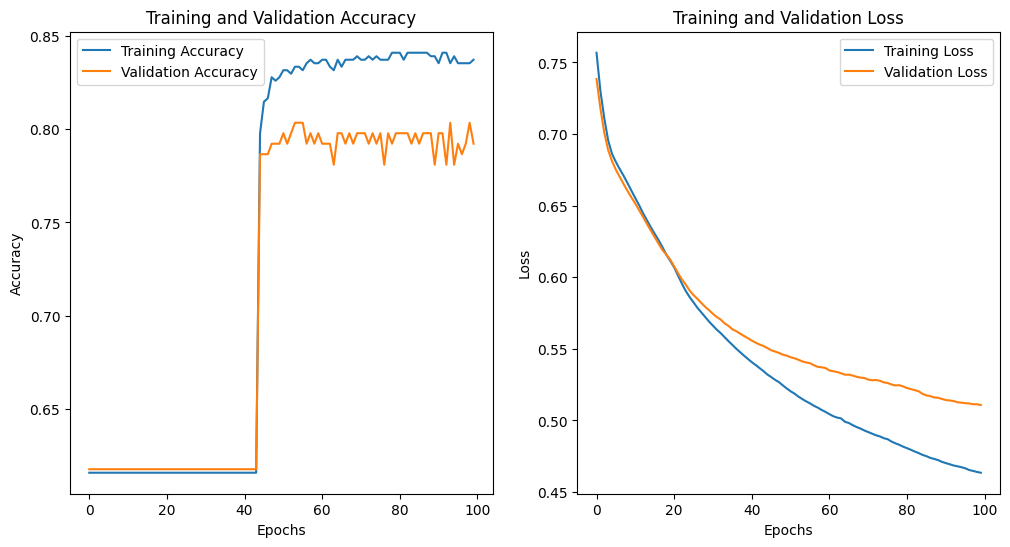

In [144]:
# Plot training & validation accuracy vs epochs
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot training & validation loss vs epochs
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [145]:
# Generate predictions for the test set
y_pred_prob = model.predict(X_test)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


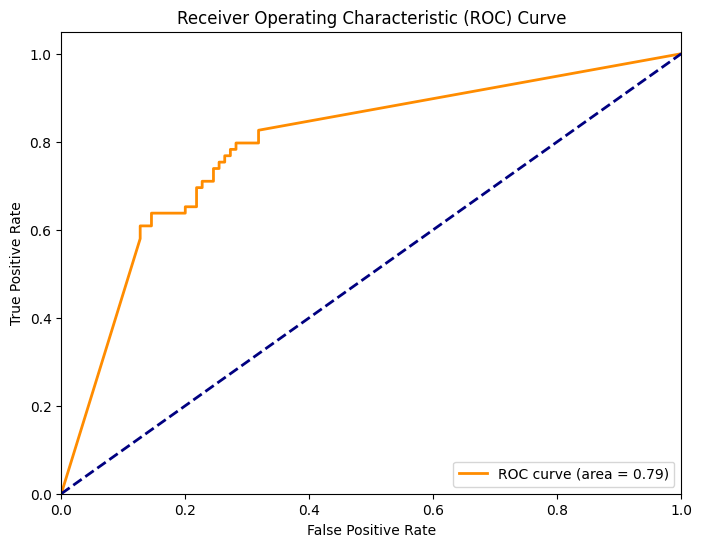

In [146]:
# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

<Figure size 600x600 with 0 Axes>

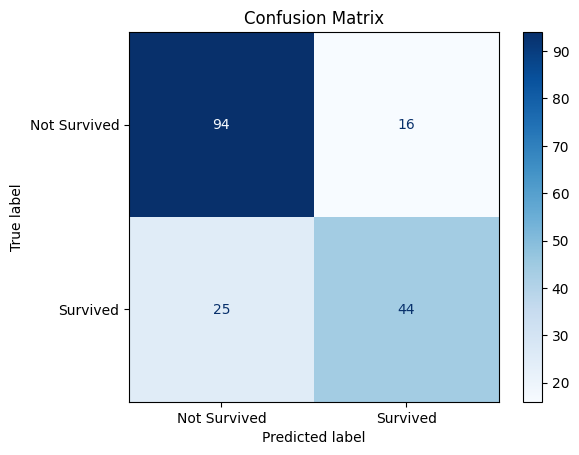

In [147]:
# Convert probabilities to binary predictions for confusion matrix
y_pred = (y_pred_prob > 0.5).astype(int)

# Compute and plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Not Survived', 'Survived'])

plt.figure(figsize=(6, 6))
disp.plot(cmap=plt.cm.Blues, values_format='d')
plt.title('Confusion Matrix')
plt.show()